## Microdosimetric analysis of Geant4 CNPTEPC simulation data
### Andrei R. Hanu - andrei.hanu@nasa.gov

Explain what this algorithm does here

Please.


In [26]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

In [27]:
##########################################################################################
# rcParams (Publication Quality Graphs)

fig_width_pt = 246.0  					# Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0 		# Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt	# Width in inches
fig_height = fig_width*golden_mean 		# Height in inches
#fig_size =  [fig_width, fig_height]
fig_size =  [14.6,8.4]
params = {'backend': 'pdf',
        'axes.labelsize': 16,
        'legend.fontsize':16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Avant Garde',
        'font.size': 16,
        'text.usetex': True,
        'figure.figsize': fig_size}

rcParams.update(params)

In [28]:
# Energy threshold for detection (eV)
Thr_TEPC = 100.
Thr_ACD = 100.

In [29]:
##########################################################################################
# Load the simulation data
DataFrame = []

##########################################################################################
# Data location folder
# Data filename template
DataFolder = '../Results/Electrons/4p16mm_scintillator/'
DataFilename = 'e-_40000keV_ISO_nt_G4CNPTEPC_t*.csv'

##########################################################################################
# Process the simulation data files
# Column 0 - Energy deposited in the TEPC sensitive volume [eV]
# Column 1 - Track length of particles that entirely traverse the TEPC [mm]
# Column 2 - Energy deposited in the plastic scintillator [eV]
for dataFile in glob.glob(DataFolder + DataFilename):  
    print 'Importing data file: ' + dataFile
    df = pandas.read_csv(dataFile, header=-1, skiprows=6, usecols=[0,1,2])
    DataFrame.append(df) 
    
# Merge the DataFrames from each file
Data = pandas.concat(DataFrame).values

# Print the number of total events
print '\nTotal number of events: \t\t', Data[:,0].size
print 'Number of coincidence events: \t\t', Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),0].size
print 'Number of anti-coincidence events: \t', Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] > Thr_TEPC)),0].size
print 'Number of sub-threshold events: \t', Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] <= Thr_TEPC)),0].size

Importing data file: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t0.csv
Importing data file: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t1.csv
Importing data file: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t2.csv
Importing data file: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t3.csv
Importing data file: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t4.csv
Importing data file: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t5.csv
Importing data file: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t6.csv
Importing data file: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t7.csv

Total number of events: 		4535249
Number of coincidence events: 		3151226
Number of anti-coincidence events: 	287
Number of sub-threshold events: 	155


In [30]:
##########################################################################################
# Logarithmic bin generation

# Mean Chord Length
xchord = 2.0*2/3       # 2 um Tissue Size 

# Logarithmic scale parameters
ymin = 0.1
ymax = 1000.0
B = 60
N = np.log10(ymax/ymin)
  
# Logarithmic bin generation
i = np.arange(B*N)
y2 = ymin*10**(i/B)
y2low = y2*10**(-0.5/B)
y2up = y2*10**(0.5/B)

In [31]:
##########################################################################################
# Redistribution of data in logarithmic scale

# Convert from energy deposited to linear energy (keV/um) 
# Note energy deposited is in units of eV
y = Data[Data[:,0] > Thr_TEPC,0]/xchord/1000;
y_COINC = Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),0]/xchord/1000;
y_ACOINC = Data[np.logical_and((Data[:,2] <= Thr_ACD),(Data[:,0] > Thr_TEPC)),0]/xchord/1000;

# Use Numpy to bin the data into the new logarithmic bins
# This is much faster than looping through the data
Ny, bins = np.histogram(y, bins=np.insert(y2up, y2up[0],y2low[0]))
Ny_COINC, bins = np.histogram(y_COINC, bins=np.insert(y2up, y2up[0],y2low[0]))
Ny_ACOINC, bins = np.histogram(y_ACOINC, bins=np.insert(y2up, y2up[0],y2low[0]))

# Create Y-Axis (yNy)
yNy = Ny*y2
yNy_COINC = Ny_COINC*y2
yNy_ACOINC = Ny_ACOINC*y2
ydy = (yNy/np.sum(yNy))*B/np.log(10)
ydy_COINC = (yNy_COINC/np.sum(yNy_COINC))*B/np.log(10)
ydy_ACOINC = (yNy_ACOINC/np.sum(yNy_ACOINC))*B/np.log(10)

In [ ]:
##########################################################################################
# Plot the data
fig_yNy, ax_yNy = plt.subplots(1,1)

plt.semilogx(y2, yNy, linewidth=1.0, label="Total")
plt.semilogx(y2, yNy_COINC, linewidth=1.0, label="Coincidence")
plt.semilogx(y2, yNy_ACOINC, linewidth=1.0, label="Anti-Coincidence")

# Figure Properties
ax_yNy.set_xlabel('Lineal Energy, y(keV/um)')
ax_yNy.set_ylabel('yN(y)')   
ax_yNy.set_xlim(ymin, ymax)
# ax_yNy.set_ylim(0, 1.5E4)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Tight Layout
plt.tight_layout()

# Save the figure 
file_yNy = DataFilename.split('.')[0][:-1]+'.pdf'
plt.savefig(DataFolder + file_yNy, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_yNy)

# Show the figure
plt.show(fig_yNy)

In [33]:
# Incident Particle Fluence in cm^-2
N = 10000000.
R = 7.75

print 'Total Geometry Factor (cm2*sr): \t\t', \
        str.format('{0:.2f}',np.sum(Ny)/N*4*(np.pi**2)*(R**2)), \
        "+/-" , \
        str.format('{0:.2f}',4*(np.pi**2)*(R**2)*np.sqrt((1-np.sum(Ny)/N)*np.sum(Ny)/N**2))
        
print 'Coincidence Geometry Factor (cm2*sr): \t\t', \
        str.format('{0:.2f}',np.sum(Ny_COINC)/N*4*(np.pi**2)*(R**2)), \
        "+/-" , \
        str.format('{0:.2f}',4*(np.pi**2)*(R**2)*np.sqrt((1-np.sum(Ny_COINC)/N)*np.sum(Ny_COINC)/N**2))
        
print 'Anti-coincidence Geometry Factor (cm2*sr): \t', \
        str.format('{0:.2f}',np.sum(Ny_ACOINC)/N*4*(np.pi**2)*(R**2)), \
        "+/-" , \
        str.format('{0:.2f}',4*(np.pi**2)*(R**2)*np.sqrt((1-np.sum(Ny_ACOINC)/N)*np.sum(Ny_ACOINC)/N**2))

Total Geometry Factor (cm2*sr): 		632.73 +/- 0.33
Coincidence Geometry Factor (cm2*sr): 		632.67 +/- 0.33
Anti-coincidence Geometry Factor (cm2*sr): 	0.06 +/- 0.00


In [34]:
# Percent Error
Ny_err = np.sqrt(Ny)/Ny*100
print 'Median Error: ', np.median(Ny_err[Ny_err>0])

Median Error:  1.45228051391


In [35]:
Ny_err, bins_Ny_err = np.histogram(np.sqrt(Ny)/Ny*100, bins=50, range=[0,5], normed=False, weights=None, density=None)

Plot saved to: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t_error.pdf


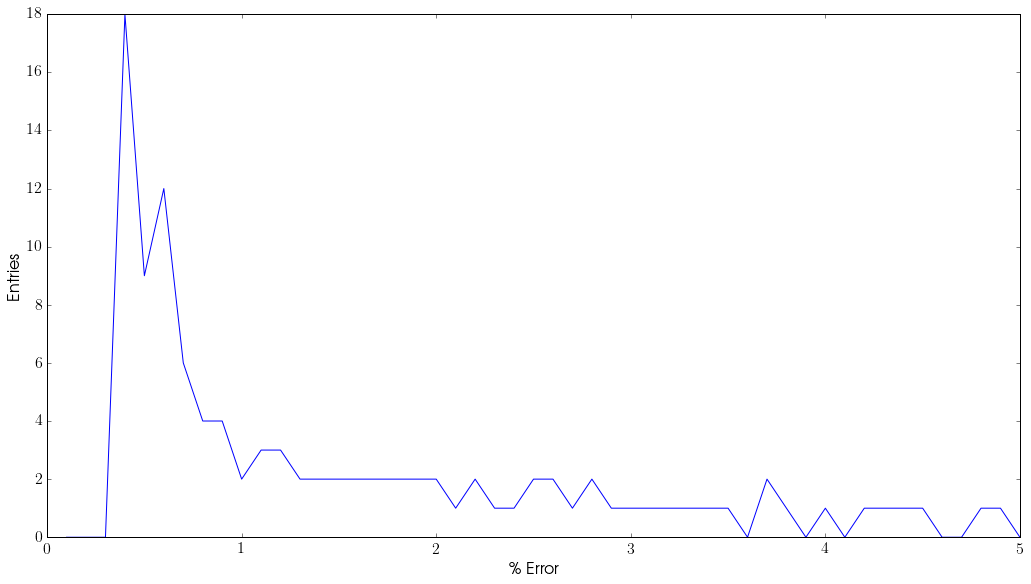

In [36]:
##########################################################################################
# Plot the errors
fig_Ny_err, ax_Ny_err = plt.subplots(1,1)

plt.plot(bins_Ny_err[1:], Ny_err, linewidth=1.0)

# Figure Properties
ax_Ny_err.set_xlabel('\% Error')
ax_Ny_err.set_ylabel('Entries')   
ax_Ny_err.set_xlim(0, 5)

# Tight Layout
plt.tight_layout()

# Save the figure 
file_Ny_err = DataFilename.split('.')[0][:-1]+'_error.pdf'
plt.savefig(DataFolder + file_Ny_err, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_Ny_err)

# Show the figure
plt.show(fig_Ny_err)

100.001 223.488 21865.9 3151226
2933.93 1933580.0 22938300.0 3151226
Plot saved to: ../Results/Electrons/4p16mm_scintillator/e-_40000keV_ISO_nt_G4CNPTEPC_t_eDep.pdf


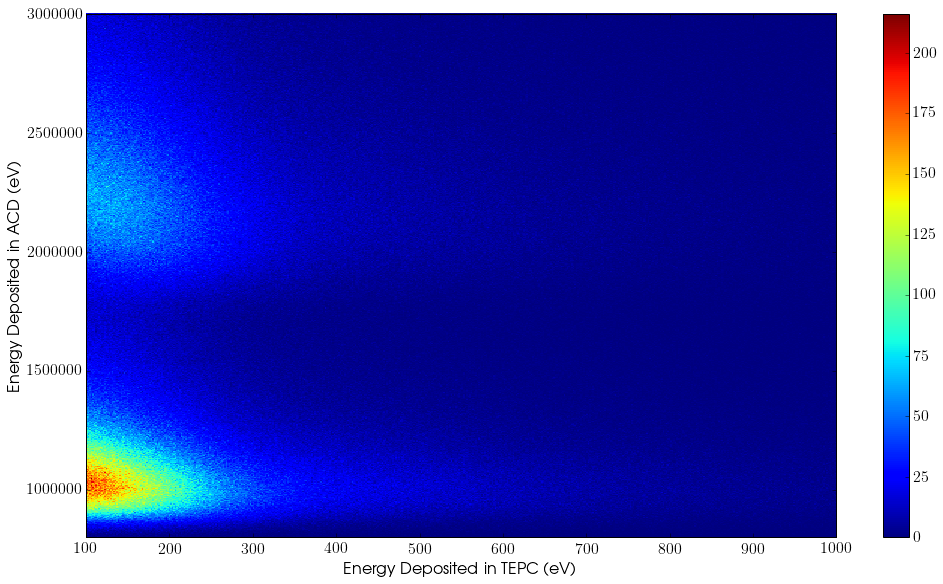

In [38]:
eDep_TEPC = Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),0]
eDep_ACD = Data[np.logical_and((Data[:,2] > Thr_ACD),(Data[:,0] > Thr_TEPC)),2]
print np.min(eDep_TEPC),np.median(eDep_TEPC),np.max(eDep_TEPC), eDep_TEPC.size
print np.min(eDep_ACD),np.median(eDep_ACD),np.max(eDep_ACD), eDep_ACD.size

##########################################################################################
# Plot of energy deposited in TEPC 

# Fix the number of bins
numBins = 5E2

# Create histogram
fig_eDep, ax_eDep = plt.subplots(1,1)

# Draw histogram
H = ax_eDep.hist2d(eDep_TEPC,eDep_ACD, numBins, range=np.array([(1E2, 1E3), (8E5, 3E6)]))

# Draw the color bar
cbar = fig_eDep.colorbar(H[3], ax=ax_eDep)
cbar.solids.set_edgecolor("face")

# Figure Properties
ax_eDep.set_xlabel('Energy Deposited in TEPC (eV)')
ax_eDep.set_ylabel('Energy Deposited in ACD (eV)')   
ax_eDep.set_xlim(np.min(H[1]), np.max(H[1]))
ax_eDep.set_ylim(np.min(H[2]), np.max(H[2]))

# Tight Layout
plt.tight_layout()

# Save the figure 
file_eDep = DataFilename.split('.')[0][:-1]+'_eDep.pdf'
plt.savefig(DataFolder + file_eDep, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_eDep)

# Show the figure
plt.show(fig_eDep)